# Business Problem:

On the basis of given parameters our aim is to predict whether patient have liver disease or not

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Data Collection

In [2]:
data = pd.read_csv('Liver.csv')

In [3]:
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [4]:
data.rename(columns={'65':'Age','Female':'Gender','0.7':'Total_Bilirubin','0.1':'Direct_Bilirubin','187':'Alkline_Phospate','16':'Alamine_Aminotra','18':'Aspartate_Aminotra','6.8':'Total_Protiens','3.3':'Albumin','0.9':'A-G_ratio','1':'target'},inplace=True)

In [5]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkline_Phospate,Alamine_Aminotra,Aspartate_Aminotra,Total_Protiens,Albumin,A-G_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [6]:
data.shape

(582, 11)

In [7]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkline_Phospate,Alamine_Aminotra,Aspartate_Aminotra,Total_Protiens,Albumin,A-G_ratio,target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 582 non-null    int64  
 1   Gender              582 non-null    object 
 2   Total_Bilirubin     582 non-null    float64
 3   Direct_Bilirubin    582 non-null    float64
 4   Alkline_Phospate    582 non-null    int64  
 5   Alamine_Aminotra    582 non-null    int64  
 6   Aspartate_Aminotra  582 non-null    int64  
 7   Total_Protiens      582 non-null    float64
 8   Albumin             582 non-null    float64
 9   A-G_ratio           578 non-null    float64
 10  target              582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Age                   0
Gender                0
Total_Bilirubin       0
Direct_Bilirubin      0
Alkline_Phospate      0
Alamine_Aminotra      0
Aspartate_Aminotra    0
Total_Protiens        0
Albumin               0
A-G_ratio             0
target                0
dtype: int64

In [11]:
#encoding the categorical variable
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

In [12]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkline_Phospate,Alamine_Aminotra,Aspartate_Aminotra,Total_Protiens,Albumin,A-G_ratio,target
0,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

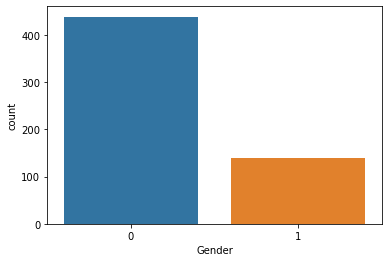

In [13]:
sns.countplot("Gender",data=data)

From the above plot we conclude that most of the patients are male

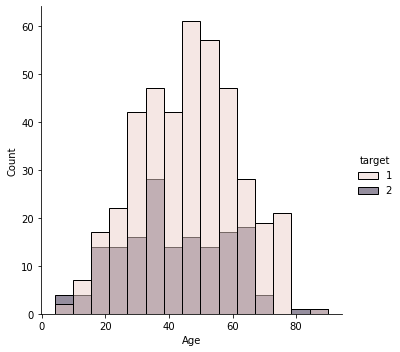

In [14]:
sns.displot(data=data,x='Age',hue='target')

From above plot we conclude that most of the patients age lies between 40 to 60

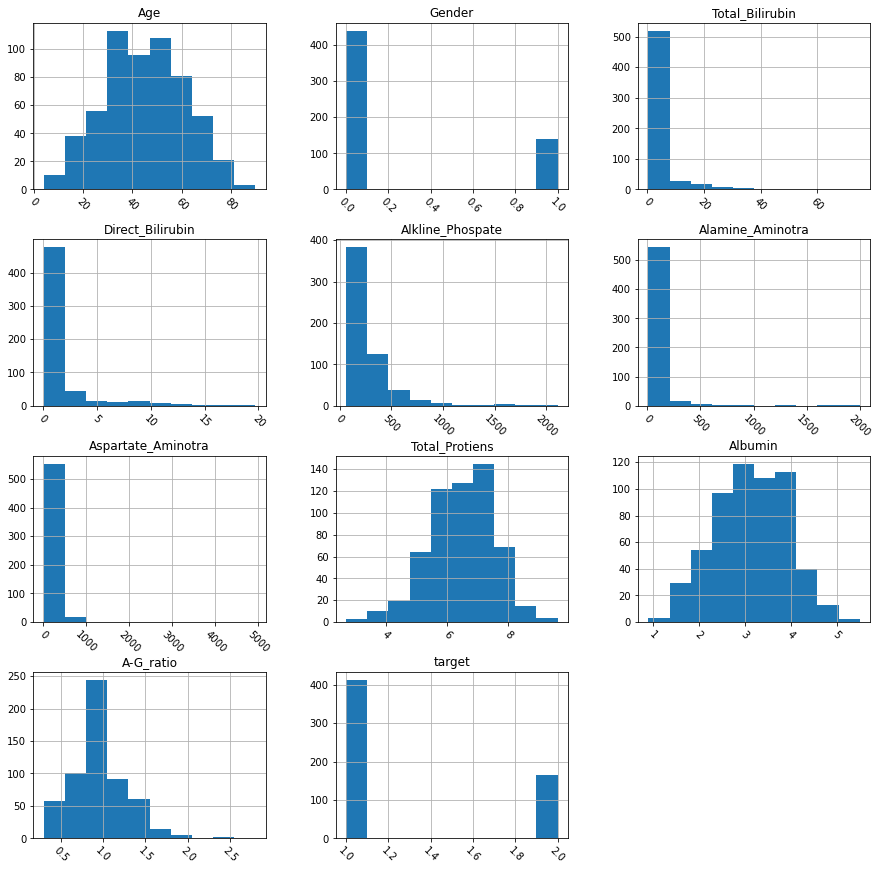

In [15]:
# Plot histogram grid
data.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# Bivariate Analysis

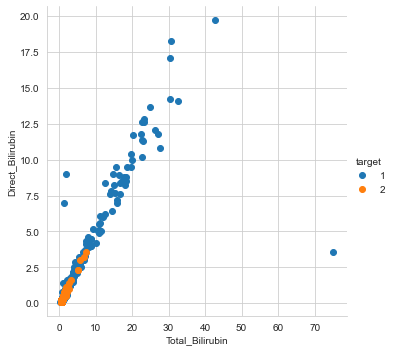

In [16]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

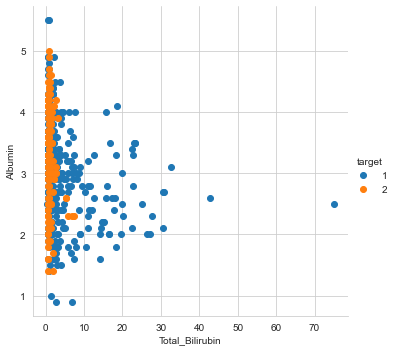

In [17]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

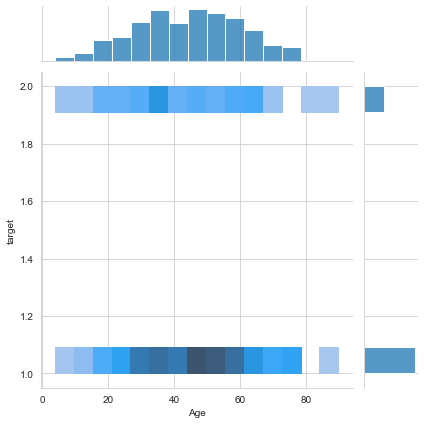

In [19]:
sns.jointplot(data=data,x='Age',y='target',kind='hist')

From the plot we can see that most of people between age 40 to 60 are  having liver disease

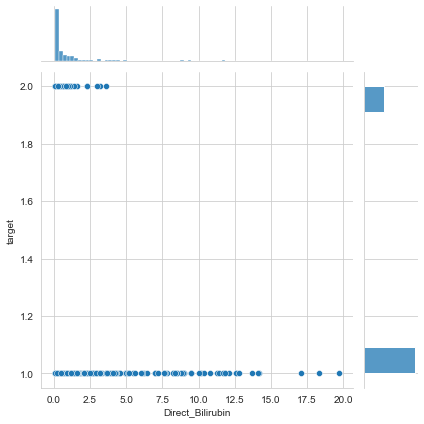

In [20]:
sns.jointplot(data=data,x='Direct_Bilirubin',y='target')

As the Direct bilirubin content increases there is less chance of getting liver disease.

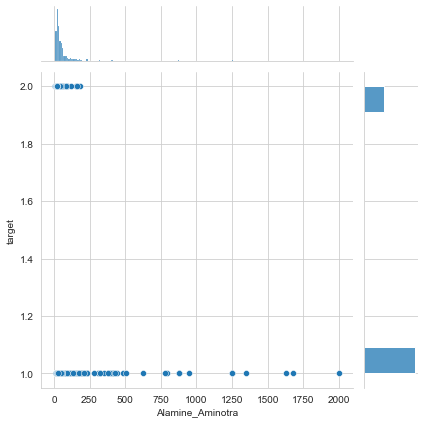

In [21]:
sns.jointplot(data=data,x='Alamine_Aminotra',y='target')

Higher alamine aminotra content has no effect in getting liver disease.

In [22]:
# Checking value counts of target
data.target.value_counts()

1    413
2    165
Name: target, dtype: int64

From the above numbers we conclude that data is imbalanced

In [23]:
df_majority = data[data.target == 1]
df_minority = data[data.target == 2]

In [24]:
# Balancing data
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=413,
                                 random_state=123)

In [25]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.target.value_counts()

2    413
1    413
Name: target, dtype: int64

 Data Preparation

In [26]:
# Defining X and y
X = df_upsampled.iloc[:,0:10]
y = df_upsampled.iloc[:,-1]

In [27]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

# Machine Learning Models

Model 1 Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_hat1 = model1.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
confusion_matrix(y_test,y_hat1)

array([[52, 44],
       [20, 91]], dtype=int64)

In [31]:
accuracy_score(y_test,y_hat1)

0.6908212560386473

Model 2 Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini')
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_hat2 = model2.predict(X_test)

In [34]:
confusion_matrix(y_test,y_hat2)

array([[ 70,  26],
       [  7, 104]], dtype=int64)

In [35]:
accuracy_score(y_test,y_hat2)

0.8405797101449275

Model 3 Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
y_hat3 = model3.predict(X_test)

In [69]:
confusion_matrix(y_test,y_hat3)

array([[ 77,  19],
       [  7, 104]], dtype=int64)

In [70]:
accuracy_score(y_test,y_hat3)

0.8743961352657005

Model 4 XGB Classifier

In [40]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
model4.fit(X_train,y_train)

[11:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_hat4 = model4.predict(X_test)

In [42]:
confusion_matrix(y_test,y_hat4)

array([[ 76,  20],
       [  9, 102]], dtype=int64)

In [43]:
accuracy_score(y_test,y_hat4)

0.8599033816425121

Model 5 Adaboost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier()
model5.fit(X_train, y_train)

AdaBoostClassifier()

In [45]:
y_hat5 = model5.predict(X_test)

In [46]:
confusion_matrix(y_test,y_hat5)

array([[66, 30],
       [22, 89]], dtype=int64)

In [47]:
accuracy_score(y_test,y_hat5)

0.748792270531401

# Hyperparameter Tuning

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
#Randomized Search CV using Random Forest Regressor

# Number of trees in random forest
estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [104]:
# Create the random grid

random_grid1 = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

Hyperparameter tuning for DecisionTreeClassifier

In [105]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random1 = RandomizedSearchCV(estimator = model2, param_distributions =random_grid1 , n_iter = 15, cv = 5, verbose=2, random_state=24, n_jobs = 1)

In [106]:
rf_random1.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=24, verbose=2)

In [107]:
rf_random.best_score_

0.7964725937581957

In [108]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

Hyperparameter tuning for RandomforestClassifier

In [114]:
random_grid2 = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [115]:
rf_random2 = RandomizedSearchCV(estimator = model3, param_distributions =random_grid2 , n_iter = 15, cv = 5, verbose=2, random_state=24, n_jobs = 1)

In [116]:
rf_random2.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   2.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   2.4s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=24, verbose=2)

In [117]:
rf_random2.best_score_

0.814253868345135

Hyperparameter tuning for XGBClassifier

In [118]:
random_grid3 = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [119]:
rf_random3 = RandomizedSearchCV(estimator = model4, param_distributions =random_grid3 , n_iter = 15, cv = 5, verbose=2, random_state=24, n_jobs = 1)

In [120]:
rf_random3.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[12:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1100; total time=   0.7s
[12:16:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=1200; total time=   0.9s
[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.6s
[12:17:01] WAR

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   0.5s
[12:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   0.7s
[12:17:08] WARN

[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.2s
[12:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[12:17:13] WARNI

[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.3s
[12:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[12:17:17] WARNING

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=800; total time=   0.5s
[12:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800; total time=   0.5s
[12:17:21] WARN

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   0.7s
[12:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.7s
[12:17:29] W

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   0.8s
[12:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=1100; total time=   0.7s
[12:17:38] WA

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exac

In [121]:
rf_random3.best_score_

0.8320351429320745

Out of all the above models we got the highest accuracy for Randomforestclassifier we also tried the hyperparameter tuning for
different models but we did not got the better accuracy the highest accuracy we got is 87% for RandomForestClassifier